In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib.colors import hsv_to_rgb

bc best success: 	0.80 ± 0.04
dagger best success: 	0.96 ± 0.02
dart best success: 	0.78 ± 0.04


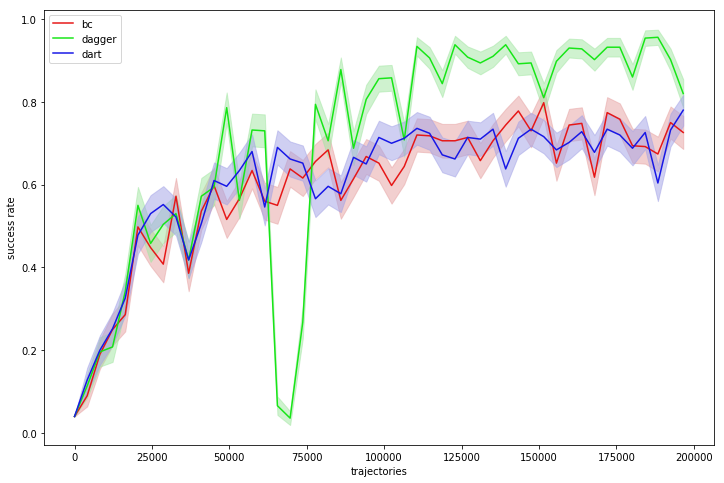

In [2]:
def plot(algo, hue, samples=500, traj_per_save=32 * 128):
    success = np.array(pickle.load(open('storage/success/{}'.format(algo), 'rb')))
    traj = np.arange(len(success)) * traj_per_save + traj_per_save
    traj = np.insert(traj, 0, 0)
    success = np.insert(success, 0, .04)
    error = np.sqrt(success * (1 - success) / samples) * 2
    error[0] = 0
    
    plt.fill_between(
        traj,
        success - error,
        success + error, 
        color=np.append(hsv_to_rgb((hue, .3, .9)), .5), 
        label='_nolegend_'
    )
    plt.plot(
        traj, 
        success,
        color=np.append(hsv_to_rgb((hue, .9, .9)), 1), 
    )
    
    i = np.argmax(success)
    print('{} best success: \t{:.2f} ± {:.2f}'.format(algo, success[i], error[i]))
    
plt.figure(figsize=(12, 8))
method = ['bc', 'dagger', 'dart']
for i, m in enumerate(method):
    plot(m, i / len(method))
plt.legend(method)
plt.xlabel('trajectories')
plt.ylabel('success rate')
plt.show()